In [117]:
import os

In [118]:
import pandas as pd

In [119]:
import numpy as np

In [120]:
import seaborn as sns

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

In [284]:
# from sklearn.linear_model import LogisticRegression

In [285]:
pwd

'C:\\Users\\nazimov_ip\\Anaconda\\ks-challenge\\src\\main\\resources\\data'

In [286]:
cd "../resources/data/"

[WinError 3] Системе не удается найти указанный путь: '../resources/data/'
C:\Users\nazimov_ip\Anaconda\ks-challenge\src\main\resources\data


In [307]:
#load dataset
tabular_data = pd.read_csv('tabular_data.csv')
#tabular_data.head(10)
print("******* train.csv report *******")
print('Shape: ', tabular_data.shape)
print('Shape w/o NaN: ', tabular_data.dropna(how='any').shape)
print('rows {:d}, unique ids: {:d}'.format(tabular_data.shape[0], tabular_data.id.nunique()))

******* train.csv report *******
Shape:  (61272, 52)
Shape w/o NaN:  (21184, 52)
rows 61272, unique ids: 5106


In [288]:
tabular_data

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,0.00,0,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0
1,0,2,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,0.00,0,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0
2,0,3,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,0.07,0,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0
3,0,4,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,0.00,0,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0
4,0,5,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,0.95,0,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61267,5105,8,110.0,77.0,NaN,0.000000,95.30,0.0,0.094381,221.85,...,-0.00,0,0.000000,0.0,75.0,0.0,0.082128,43.0,83.97,0.0
61268,5105,9,110.0,77.0,NaN,0.000000,61.87,0.0,0.105878,343.22,...,1.75,0,0.000000,0.0,75.0,0.0,0.077594,49.0,48.02,0.0
61269,5105,10,110.0,106.5,NaN,0.000000,88.05,0.0,0.040169,259.33,...,8.27,0,0.000000,0.0,99.0,1.0,0.109053,43.0,74.52,0.0
61270,5105,11,110.0,45.0,NaN,0.000000,98.40,0.0,0.040810,222.00,...,0.00,0,0.000000,0.0,0.0,0.0,0.101929,35.0,25.83,0.0


In [289]:
#load train data
train = pd.read_csv('train.csv')
train.head(10)

,id,target
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1
5,5,0
6,6,1
7,7,0
8,8,1
9,9,0


In [304]:
print("******* train.csv report *******")
print('rows {:d}, unique ids: {:d}, unique targets {:d}'.format(train.shape[0], train.id.nunique(), train.target.nunique()))
print('NaN count:')
print(train.isna().sum())
val_counts = train.target.value_counts()
print('Target value counts:\n', val_counts)
print('Class_1 probability = ', val_counts[1] / val_counts.sum())

******* train.csv report *******
rows 4084, unique ids: 4084, unique targets 2
NaN count:
id        0
target    0
dtype: int64
Target value counts:
 0    3009
1    1075
Name: target, dtype: int64
Class_1 probability =  0.26322233104799214


In [127]:
#merge train data to dataset
#pd.merge(tabular_data, train, how='left', on='id')

# Cleaning and formatting

In [301]:
tabular_data.feature_24.dtypes

dtype('float64')

### Delete nonsignificants columns (1 unique value only)

In [259]:
#TIME CONSUMING! (because of nunique)
#count uniques and check for data types
#NaN is not unique value!
#Look for object - it's categorial, so should be converted to dummies
tabular_data_report = pd.DataFrame({'dtypes':tabular_data.dtypes,
                                    'nunique':tabular_data.nunique(), 
                                    'nan_count':tabular_data.isna().sum(),
                                    'min':tabular_data.min(),
                                    'max':tabular_data.max()
#                                     ,
#                                     'max_unique_count':tabular_data.groupby(tabular_data).count().max() / tabular_data.count()
                                   })

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional

In [129]:
#Excel requires ";" separator
#tabular_data_report.to_csv('tabular_data_report.csv', index=True)

In [130]:
tabular_data_report.sort_values(by='nunique')

,dtypes,nunique,nan_count,min,max
feature_41,int64,1,0,0,0
feature_0,float64,6,2812,110,119
feature_25,object,8,0,11e623a37e87cf7995c466723ec99688d55cae8c,f9ae10397ed62e79c644d06842bbcd92963a5927
period,int64,12,0,1,12
feature_43,float64,32,3054,0,31
feature_15,float64,63,2862,-31,31
feature_14,float64,260,2906,0,2228
feature_45,float64,261,2965,0,504
feature_24,float64,272,2951,0,1580
feature_37,float64,452,2863,0,900


In [131]:
#probably categorical features (name, type, number of uniques, number of NaNs):
#feature_0, float64, 6, 2812
#feature_25, object, 8, 0
#feature_43, float64, 32, 3054
#feature_15, float64, 63, 2862

In [132]:
#look for unsignificant features - single unique value and no NaNs
tabular_data_report[tabular_data_report['nunique'] == 1]

,dtypes,nunique,nan_count,min,max
feature_41,int64,1,0,0,0


In [133]:
#delete nonsignificant: 
#feature_41
cleaned_data = tabular_data.drop(columns=['feature_41'], errors='ignore')

### Encode object values (feature_25)

In [134]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cleaned_data['feature_25'] = le.fit_transform(cleaned_data['feature_25'])
# targeted_data['feature_25'].nunique()

In [135]:
cleaned_data.feature_25

0        7
1        7
2        7
3        7
4        0
        ..
61267    3
61268    3
61269    3
61270    3
61271    3
Name: feature_25, Length: 61272, dtype: int32

### Combine correlated columns (input: cleaned_data)

In [136]:
#merge train data to dataset
targeted_data = pd.merge(cleaned_data, train, how='left', on='id')

In [137]:
#calculate Pearson correlations
data_corr = targeted_data[targeted_data.target.isna() != True].corr(method='pearson')
# cleaned_data_corr

In [138]:
#calculate pearson correlation of features
#print the most correlated pairs 
margin = 0.8
correlation_report = pd.DataFrame(columns=['column_a', 'column_b', 'column_a_index', 'column_b_index',
                                          'correlation', 'a_nans_count', 'b_nans_count', 'both_is_nan_count'])
for r in range(1, data_corr.shape[0]-1):
    for c in range(0, r-1):
        if (data_corr.iloc[r][c] > margin) or (data_corr.iloc[r][c] < -margin):
            print(data_corr.columns[c], "=", data_corr.columns[r], 
                  ' (columns {:d}:{:d}, correlation={:.3f})'.format(c, r, data_corr.iloc[r][c]))
            correlation_report = correlation_report.append({
                'column_a':data_corr.columns[c],
                'column_b':data_corr.columns[r],
                'column_a_index':c,
                'column_b_index':r,
                'correlation':data_corr.iloc[r][c],
                'both_is_nan_count':targeted_data.iloc[:, r].isna().combine(targeted_data.iloc[:, c].isna(), 
                                                                     lambda s1, s2: s1 and s2).sum(),
                'a_nans_count':targeted_data.iloc[:, c].isna().sum(),
                'b_nans_count':targeted_data.iloc[:, r].isna().sum()
                }, ignore_index=True)
print("Completed")
#' both is NaN:', 

feature_4 = feature_10  (columns 6:12, correlation=0.996)
feature_7 = feature_18  (columns 9:20, correlation=0.993)
feature_14 = feature_24  (columns 16:26, correlation=0.835)
feature_26 = feature_30  (columns 28:32, correlation=0.991)
feature_26 = feature_32  (columns 28:34, correlation=0.825)
feature_30 = feature_32  (columns 32:34, correlation=0.834)
feature_19 = feature_33  (columns 21:35, correlation=-0.887)
feature_4 = feature_36  (columns 6:38, correlation=0.915)
feature_10 = feature_36  (columns 12:38, correlation=0.921)
feature_20 = feature_44  (columns 22:45, correlation=1.000)
feature_8 = feature_47  (columns 10:48, correlation=0.802)
feature_4 = feature_48  (columns 6:49, correlation=0.985)
feature_10 = feature_48  (columns 12:49, correlation=0.989)
feature_36 = feature_48  (columns 38:49, correlation=0.851)
Completed


In [139]:
correlation_report.sort_values(by='correlation')

,column_a,column_b,column_a_index,column_b_index,correlation,a_nans_count,b_nans_count,both_is_nan_count
6,feature_19,feature_33,21,35,-0.886870,3564,3778,2418
10,feature_8,feature_47,10,48,0.802164,2934,2854,1778
4,feature_26,feature_32,28,34,0.824922,2668,3002,1778
5,feature_30,feature_32,32,34,0.833727,2815,3002,1790
2,feature_14,feature_24,16,26,0.835141,2906,2951,1814
13,feature_36,feature_48,38,49,0.850897,2827,2904,1814
7,feature_4,feature_36,6,38,0.914574,2847,2827,1766
8,feature_10,feature_36,12,38,0.921176,2954,2827,1766
11,feature_4,feature_48,6,49,0.985121,2847,2904,1790
12,feature_10,feature_48,12,49,0.988586,2954,2904,1766


In [140]:
#most correlated features are:
#20-44
#7-18
#26-30
#4-10-48(-36)

In [141]:
#procedure combine two features with imputation of skipped values
#shrinks result to mean and standard deviation of feature1
# df - input/output dataframe
# feature1, feature2 - string name of features to combine
# combined_feature_name - string name of new combined column
# feature1_weight - weight of feature1
# correlation_sign - -1 if feature2 has opposite sign; 1 otherwise
def combine_na(df, feature1, feature2, combined_feature_name, feature1_weight=0.5, correlation_sign=1):
    #calculate means and standard deviation for both non-null values
    df_f1_f2 = df[{feature1, feature2}].dropna()
    f1_mean = df_f1_f2[feature1].mean()
    f1_std = df_f1_f2[feature1].std() 
    f2_mean = df_f1_f2[feature2].mean()
    f2_std = df_f1_f2[feature2].std() 
    f1_f2_ratio = correlation_sign * f1_std / f2_std

    f2_shrinked = feature2 + '_shrinked_to_' + feature1
    d_f2_shrinked = df[feature2].add(-f2_mean).mul(f1_f2_ratio).add(f1_mean)
    df[combined_feature_name] = (
        ((df[feature1] + d_f2_shrinked) / 2)
        .mask(pd.isnull, df[feature1])
        .mask(pd.isnull, d_f2_shrinked)
    )

In [142]:
# playground for combine_na test
d = pd.DataFrame({'a':[1,2,5], 'b':[101,104,110]})
d = d.append(pd.DataFrame({'a':[4,5]}), ignore_index=True).append(
             pd.DataFrame({'b':[70,95]}), ignore_index=True).append(
             pd.DataFrame({'c':[123,34123]})) #stub for NaNs in both a and b columns
#                 .drop(columns=['c']) 
print(d)
combine_na(d, 'a', 'b', 'ab')
d

     a      b        c
0  1.0  101.0      NaN
1  2.0  104.0      NaN
2  5.0  110.0      NaN
3  4.0    NaN      NaN
4  5.0    NaN      NaN
5  NaN   70.0      NaN
6  NaN   95.0      NaN
0  NaN    NaN    123.0
1  NaN    NaN  34123.0


,a,b,c,ab
0,1.0,101.0,NaN,0.924820
1,2.0,104.0,NaN,2.106205
2,5.0,110.0,NaN,4.968975
3,4.0,NaN,NaN,4.000000
4,5.0,NaN,NaN,5.000000
5,NaN,70.0,NaN,-13.232320
6,NaN,95.0,NaN,-1.875901
0,NaN,NaN,123.0,NaN
1,NaN,NaN,34123.0,NaN


In [143]:
#combine 'feature_20', 'feature_44'
combine_na(targeted_data, 'feature_20', 'feature_44', 'feature_20_44')
targeted_data = targeted_data.drop(columns=['feature_20', 'feature_44'], errors='ignore')

In [144]:
#combine 'feature_7', 'feature_18'
combine_na(targeted_data, 'feature_7', 'feature_18', 'feature_7_18')
targeted_data = targeted_data.drop(columns=['feature_7', 'feature_18'], errors='ignore')

In [145]:
#combine 'feature_26', 'feature_30'
combine_na(targeted_data, 'feature_26', 'feature_30', 'feature_26_30')
targeted_data = targeted_data.drop(columns=['feature_26', 'feature_30'], errors='ignore')

In [146]:
#combine 4-10-48(-36)
combine_na(targeted_data, 'feature_4', 'feature_10', 'feature_4_10')
combine_na(targeted_data, 'feature_4_10', 'feature_48', 'feature_4_10_48', 0.67)
# cleaned_data[{'feature_4', 'feature_10', 'feature_36', 'feature_48', 'feature_4_10', 'feature_4_10_48'}].head(40)
targeted_data = targeted_data.drop(columns=['feature_4', 'feature_10', 'feature_48', 'feature_4_10'], errors='ignore')

In [147]:
targeted_data.columns

Index(['id', 'period', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_5', 'feature_6', 'feature_8', 'feature_9', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_19', 'feature_21', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_27', 'feature_28', 'feature_29',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_42', 'feature_43', 'feature_45', 'feature_46', 'feature_47',
       'feature_49', 'target', 'feature_20_44', 'feature_7_18',
       'feature_26_30', 'feature_4_10_48'],
      dtype='object')

In [148]:
print('Before combining:')
print('Shape: ', tabular_data.shape)
print('Shape w/o NaN: ', tabular_data.dropna(how='any').shape)
print('\nAfter combining:')
print('Shape: ', targeted_data.shape)
print('Shape w/o NaN: ', targeted_data.dropna(how='any').shape)

Before combining:
Shape:  (61272, 52)
Shape w/o NaN:  (21184, 52)

After combining:
Shape:  (61272, 47)
Shape w/o NaN:  (20356, 47)


### Clean categorical features

In [ ]:
#suppose categorical if
# object type
# numeric type and...
#   few uniques
#   significant class1 distribution between adjacent values
# it should treat NaN as another value if class1 probability for NaNs is different to mean that of (0.263) 

In [149]:
#probably categorical features (name, type, number of uniques, number of NaNs):
#feature_0, float64, 6, 2812
#feature_15, float64, 63, 2862
#feature_25, object, 8, 0
#feature_43, float64, 32, 3054
categoricalFeatures = ['feature_0', 'feature_15', 'feature_25', 'feature_43']
categoricalFeatures

['feature_0', 'feature_15', 'feature_25', 'feature_43']

In [158]:
nonCategoricalFeatures = (
    targeted_data.columns
    .drop(categoricalFeatures)
    .drop(['id', 'period', 'target'])
    .array
)
nonCategoricalFeatures

<PandasArray>
[      'feature_1',       'feature_2',       'feature_3',       'feature_5',
       'feature_6',       'feature_8',       'feature_9',      'feature_11',
      'feature_12',      'feature_13',      'feature_14',      'feature_16',
      'feature_17',      'feature_19',      'feature_21',      'feature_22',
      'feature_23',      'feature_24',      'feature_27',      'feature_28',
      'feature_29',      'feature_31',      'feature_32',      'feature_33',
      'feature_34',      'feature_35',      'feature_36',      'feature_37',
      'feature_38',      'feature_39',      'feature_40',      'feature_42',
      'feature_45',      'feature_46',      'feature_47',      'feature_49',
   'feature_20_44',    'feature_7_18',   'feature_26_30', 'feature_4_10_48']
Length: 40, dtype: object

In [191]:
def print_categorical_report(df, feature):
    for i in df[feature].unique():
        if pd.isna(i):
            continue
        total = df[df[feature] == i].shape[0]
        class1 = df[df.target == 1][df[feature] == i].shape[0]
        class0 = df[df.target == 0][df[feature] == i].shape[0]
        print(i, ': ', total, ' target 1_0 ratio: ', class1, class0, class1/class0)
    
    class1 = df[df.target == 1][df[feature].isna()][feature].isna().sum()
    class0 = df[df.target == 0][df[feature].isna()][feature].isna().sum()
    print('NaN: ', df[df[feature].isna()][feature].isna().sum(), 
          ' target 1_0 ratio: ', class1, class0, class1/class0)

In [194]:
print_categorical_report(targeted_data, 'feature_25')

<ipython-input-191-3dd65ef37460>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class1 = df[df.target == 1][df[feature] == i].shape[0]
<ipython-input-191-3dd65ef37460>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class0 = df[df.target == 0][df[feature] == i].shape[0]


7 :  37061  target 1_0 ratio:  8663 21113 0.41031591910197507
0 :  4107  target 1_0 ratio:  803 2396 0.33514190317195325
2 :  5105  target 1_0 ratio:  740 3321 0.2228244504667269
3 :  13279  target 1_0 ratio:  2304 8285 0.27809293904646953
1 :  1297  target 1_0 ratio:  253 765 0.330718954248366
4 :  80  target 1_0 ratio:  30 45 0.6666666666666666
6 :  313  target 1_0 ratio:  107 156 0.6858974358974359
5 :  30  target 1_0 ratio:  0 27 0.0
NaN:  0  target 1_0 ratio:  0 0 nan


<ipython-input-191-3dd65ef37460>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class1 = df[df.target == 1][df[feature].isna()][feature].isna().sum()
<ipython-input-191-3dd65ef37460>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class0 = df[df.target == 0][df[feature].isna()][feature].isna().sum()
<ipython-input-191-3dd65ef37460>:13: RuntimeWarning: invalid value encountered in longlong_scalars
  ' target 1_0 ratio: ', class1, class0, class1/class0)


Text(0, 0.5, 'Flights')

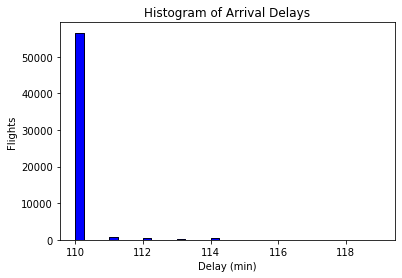

In [204]:
df = targeted_data['feature_0']

plt.hist(df, color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(df, hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [232]:
df[df == 110].count() / df.size

0.9230643687165426

In [234]:
df.isna().sum()

2812

In [236]:
df.size

61272

In [276]:
df = targeted_data[{'feature_0', 'feature_25'}]
df.agg(max)


feature_25      7.0
feature_0     119.0
dtype: float64

In [277]:
df = targeted_data['feature_17'].nunique()

In [282]:
targeted_data.columns.drop(['id'])

Index(['period', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_5', 'feature_6', 'feature_8', 'feature_9', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_19', 'feature_21', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_27', 'feature_28', 'feature_29',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_42', 'feature_43', 'feature_45', 'feature_46', 'feature_47',
       'feature_49', 'target', 'feature_20_44', 'feature_7_18',
       'feature_26_30', 'feature_4_10_48'],
      dtype='object')

### Analyze density

In [151]:
#merge with train data
# cleaned_data = pd.merge(cleaned_data, train, how='left', on='id')

In [152]:
# cleaned_data = cleaned_data.drop(columns=['target_x','target_y'])
# targeted_data

In [154]:
np.nanmin(targeted_data.feature_0.unique()) > 0

True

In [155]:
targeted_data.feature_0.dtype == 'float'

True

In [156]:
targeted_data.feature_15[targeted_data.feature_15 == 0].count()

25070

In [157]:
targeted_data[categoricalFeatures]

,feature_0,feature_15,feature_25,feature_43
0,110.0,0.0,7,0.0
1,110.0,0.0,7,0.0
2,110.0,0.0,7,0.0
3,110.0,0.0,7,0.0
4,110.0,21.0,0,0.0
...,...,...,...,...
61267,110.0,0.0,3,0.0
61268,110.0,0.0,3,0.0
61269,110.0,0.0,3,0.0
61270,110.0,0.0,3,0.0


### Visualize target distribution

In [32]:
#replace feature_25 with dummies
#There is no NaNs 
feature_25_vals = pd.DataFrame({'feature_25':tabular_data.feature_25.unique()})
#add dummies
# feature_25_vals = feature_25_vals.reset_index().rename(columns = {'index':'feature_25_index'})
feature_25_vals = feature_25_vals.combine_first(pd.get_dummies(feature_25_vals.index, prefix='feature_25'))
#feature_25_vals

In [33]:
#merge feature_25 dummies
cleaned_data = pd.merge(cleaned_data, feature_25_vals, how = 'left', on='feature_25')
#delete feature_25
cleaned_data = cleaned_data.drop(columns=['feature_25'], errors='ignore')
# cleaned_data

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_48,feature_49,feature_25_0,feature_25_1,feature_25_2,feature_25_3,feature_25_4,feature_25_5,feature_25_6,feature_25_7
0,0,1,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,133.28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,229.97,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,3,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,231.78,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,4,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,183.83,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,5,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,155.83,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61267,5105,8,110.0,77.0,NaN,0.000000,95.30,0.0,0.094381,221.85,...,83.97,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
61268,5105,9,110.0,77.0,NaN,0.000000,61.87,0.0,0.105878,343.22,...,48.02,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
61269,5105,10,110.0,106.5,NaN,0.000000,88.05,0.0,0.040169,259.33,...,74.52,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
61270,5105,11,110.0,45.0,NaN,0.000000,98.40,0.0,0.040810,222.00,...,25.83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
